In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1. Merge traffic data with listing address -- Traffic in Denver

Two output datasets are sellers'&buyers' ads impressions, clicks, conversions, cost, and property counts per month from June 2018(buyer) or Apr 2019 (seller), to Oct 2020.

In [12]:
buyer_traffic = pd.read_csv('data/newdata/buyer_traffic.csv')
seller_traffic = pd.read_csv('data/newdata/seller_traffic.csv')
#daily_buyer_traffic = pd.read_csv('data/newdata/daily_buyer_traffic.csv')
#daily_seller_traffic = pd.read_csv('data/newdata/daily_seller_traffic.csv', delimiter="\t")
listing_address_info = pd.read_csv('data/newdata/listing_address_info.csv')


In [8]:
buyer_traffic.head()

,id,rex_url,impressions,clicks,conversions,cost,report_day,vendor
0,71479,1081-lakeview-ter,43,2,0.0,0.60,2018-03-26,Fb-Ads
1,134638,23926-arroyo-park-dr-unit-119,29,3,0.0,0.46,2018-03-26,Fb-Ads
2,88617,14125-w-oak-ln,1561,182,1.0,15.05,2018-03-27,Fb-Ads
3,71480,1081-lakeview-ter,1179,85,3.0,15.03,2018-03-27,Fb-Ads
4,134639,23926-arroyo-park-dr-unit-119,1486,132,2.0,15.07,2018-03-27,Fb-Ads


In [9]:
seller_traffic.head()

,dma,impressions,clicks,conversions,cost,report_day,vendor,campaign,rex_url
0,Yahoo Gemini,723,5,0.0,0.28,2019-01-12,Oath,SELLER | Yahoo Gemini | HOUSTON Testimonial,37-stockton-st
1,Yahoo Gemini,121381,223,1.0,211.77,2019-01-12,Oath,SELLER | Yahoo Gemini | LA | Predictive Segmen...,1312-stratford-ave
2,Yahoo Gemini,21,0,0.0,0.00,2019-01-12,Oath,SELLER | Yahoo Gemini | Homepage Santa Clarita,22-long-st
3,Yahoo Gemini,915,22,0.0,1.18,2019-01-12,Oath,SELLER | Yahoo Gemini | AUSTIN Testimonial,6255-honolulu-ave-unit-23
4,Yahoo Gemini,81,0,0.0,0.00,2019-01-12,Oath,SELLER | Yahoo Gemini | Homepage Santa Clarita...,17257-whatley-ave


In [13]:
listing_address_info.head()

,rex_url,address_line,city,state,postal_code,market_area
0,1335-calle-pecos,1335 CALLE PECOS,THOUSAND OAKS,CA,91360,LA
1,3037-sierra-dr,3037 SIERRA DR,WESTLAKE VILLAGE,CA,91362,LA
2,b353db38309e4dc9b36ce87d1f6a789b,1522 MALCOLM AVE,LOS ANGELES,CA,90024,LA
3,3157-fort-courage-ave,3157 FORT COURAGE AVE,THOUSAND OAKS,CA,91360,LA
4,3848-spad-pl,3848 SPAD PL,CULVER CITY,CA,90232,LA


In [14]:
listing_denver = listing_address_info[(listing_address_info['state']=='CO')&(listing_address_info['city']=='Denver')]

In [15]:
listing_denver.head()

,rex_url,address_line,city,state,postal_code,market_area
9679,9633-e-5th-ave-apt-10303,9633 E 5th Ave Apt 10303,Denver,CO,80230,Denver
9750,1540-s-yates-st,1540 S Yates St,Denver,CO,80219,Denver
9840,5006-uvalda-st,5006 Uvalda St,Denver,CO,80239,Denver
9866,3906-ireland-ct,3906 Ireland Ct,Denver,CO,80249,Denver
10189,3795-w-ohio-ave,3795 W Ohio Ave,Denver,CO,80219,Denver


In [16]:
merged_denver_buyer = pd.merge(buyer_traffic,listing_denver,on='rex_url',how='inner')
merged_denver_seller = pd.merge(seller_traffic,listing_denver,on='rex_url',how='inner')

In [17]:
buyer_denver = merged_denver_buyer.groupby(['report_day']).agg({'impressions':'sum','clicks':'sum','conversions':'sum','cost':'sum','id':'count'}).reset_index().rename(columns={'id':'property_count'})
buyer_denver.head()

,report_day,impressions,clicks,conversions,cost,property_count
0,2018-06-01,238,2,0.0,2.84,1
1,2018-06-02,170,19,1.0,4.75,1
2,2018-06-03,1508,58,0.0,13.68,1
3,2018-06-04,188,7,0.0,4.26,1
4,2018-06-11,126,0,0.0,0.70,1


In [18]:
buyer_denver['date'] = pd.to_datetime(buyer_denver['report_day'],format='%Y-%m-%d')
buyer_denver_day = buyer_denver.set_index('date',drop=True)
buyer_denver_mon = buyer_denver_day.resample('M').sum().reset_index()

In [19]:
buyer_denver_mon.head()

,date,impressions,clicks,conversions,cost,property_count
0,2018-06-30,33678,734,11.0,397.68,45
1,2018-07-31,498969,4163,21.0,7477.29,289
2,2018-08-31,169968,961,1.0,2247.61,91
3,2018-09-30,359056,1463,2.0,3046.86,69
4,2018-10-31,414545,2635,7.0,3844.94,248


In [20]:
merged_denver_seller.head()

,dma,impressions,clicks,conversions,cost,report_day,vendor,campaign,rex_url,address_line,city,state,postal_code,market_area
0,SA,15704,620,2.0,78.48,2019-04-05,Oath,SELLER | SA | Native | Local,3906-ireland-ct,3906 Ireland Ct,Denver,CO,80249,Denver
1,LA,76690,212,1.0,150.65,2019-04-15,Oath,SELLER | LA | Native | Local | Justin Turner,2463-w-caithness-pl,2463 W Caithness Pl,Denver,CO,80211,Denver
2,DC,26773,65,1.0,113.76,2019-04-16,Oath,SELLER | DC | Native | Carousel | Test | Comin...,2916-s-sidney-ct,2916 S Sidney Ct,Denver,CO,80231,Denver
3,SAC,14213,24,0.0,34.31,2019-04-16,Oath,SELLER | SAC | Native | Local,1050-hooker-st,1050 Hooker St,Denver,CO,80204,Denver
4,LA,62419,241,0.0,169.17,2019-04-16,Oath,SELLER | LA | Native | Local | Justin Turner,9220-e-girard-ave-apt-12,9220 E Girard Ave Apt 12,Denver,CO,80231,Denver


In [21]:
seller_denver = merged_denver_seller.groupby(['report_day']).agg({'impressions':'sum','clicks':'sum','conversions':'sum','cost':'sum','dma':'count'}).reset_index().rename(columns={'dma':'property_count'})
seller_denver.head()

,report_day,impressions,clicks,conversions,cost,property_count
0,2019-04-05,15704,620,2.0,78.48,1
1,2019-04-15,76690,212,1.0,150.65,1
2,2019-04-16,103405,330,1.0,317.24,3
3,2019-04-17,109734,346,1.0,246.07,3
4,2019-04-18,395774,1268,7.0,1261.59,7


In [22]:
seller_denver['date'] = pd.to_datetime(seller_denver['report_day'],format='%Y-%m-%d')
seller_denver_day = seller_denver.set_index('date',drop=True)
seller_denver_mon = seller_denver_day.resample('M').sum().reset_index()

In [23]:
seller_denver_mon.head()

,date,impressions,clicks,conversions,cost,property_count
0,2019-04-30,999765,5915,18.0,3027.24,25
1,2019-05-31,3185963,11402,110.0,13437.86,175
2,2019-06-30,2275284,5447,151.0,8912.25,137
3,2019-07-31,460626,2503,35.0,6004.47,89
4,2019-08-31,261621,2801,24.0,2962.42,92


## Part 2.  EDA

### Prediction target: sales count and list count by month in Denver

In [24]:
#PREDICTION TARGET
listData = pd.read_csv('data/denver_listing_dates.csv')
listData['sale_month'] = listData.sale_date.apply(lambda x: str(x)[:-3])
listData['list_month'] = listData.list_date.apply(lambda x: str(x)[:-3])
listMonth = listData.groupby(['list_month']).agg({"property_id":"count"}).reset_index().iloc[:-1,:]
saleMonth = listData.groupby(['sale_month']).agg({"property_id":"count", "sale_price":"mean"}).reset_index().iloc[1:-2,:]
monthData = pd.merge(saleMonth,listMonth, left_on='sale_month',right_on='list_month')
monthData = monthData.rename(columns={"sale_month":"month","property_id_x":"count_sale", "property_id_y":"count_list","sale_price":"mean_price"})
monthData = monthData.drop(['list_month'],axis=1)
monthData = monthData.iloc[27:,:]#month from 2018-06 to 2020-09, 55 months in total

### Possible Features1 : total Impressions, clicks, conversions, cost, and property count by month

/Applications/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Property counts by month for buyers and sellers')

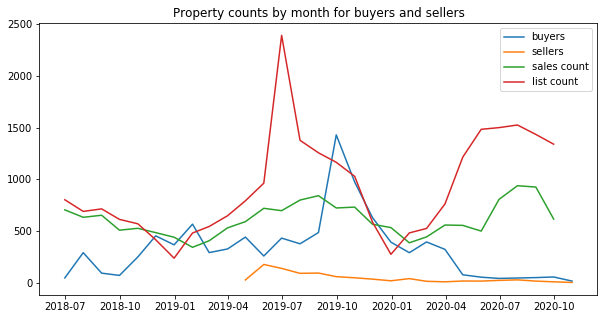

In [25]:
plt.figure(figsize=(10,5))
plt.plot(buyer_denver_mon['date'],buyer_denver_mon['property_count'],label='buyers')
plt.plot(seller_denver_mon['date'],seller_denver_mon['property_count'],label='sellers')
plt.plot(buyer_denver_mon['date'][:-1], monthData['count_sale']/10,label='sales count')
plt.plot(buyer_denver_mon['date'][:-1], monthData['count_list']/10,label='list count')
plt.legend()
plt.title('Property counts by month for buyers and sellers')

Text(0.5, 1.0, 'Impressions by month for buyers and sellers')

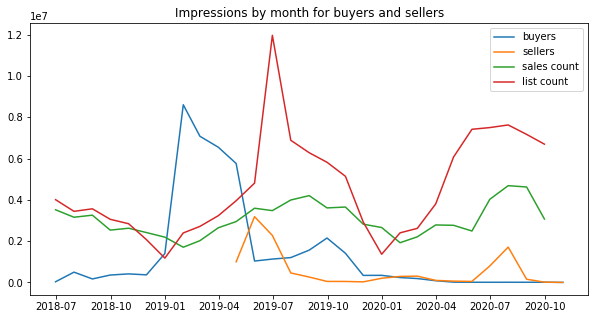

In [26]:
plt.figure(figsize=(10,5))
plt.plot(buyer_denver_mon['date'],buyer_denver_mon['impressions'],label='buyers')
plt.plot(seller_denver_mon['date'],seller_denver_mon['impressions'],label='sellers')
plt.plot(buyer_denver_mon['date'][:-1], monthData['count_sale']*500,label='sales count')
plt.plot(buyer_denver_mon['date'][:-1], monthData['count_list']*500,label='list count')
plt.legend()
plt.title('Impressions by month for buyers and sellers')

The buyers impressions moves ahead of list count.

Text(0.5, 1.0, 'Clicks per month for buyers and sellers')

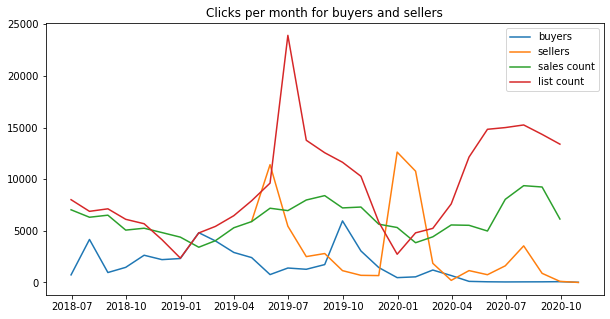

In [27]:
plt.figure(figsize=(10,5))
plt.plot(buyer_denver_mon['date'],buyer_denver_mon['clicks'],label='buyers')
plt.plot(seller_denver_mon['date'],seller_denver_mon['clicks'],label='sellers')
plt.plot(buyer_denver_mon['date'][:-1], monthData['count_sale'],label='sales count')
plt.plot(buyer_denver_mon['date'][:-1], monthData['count_list'],label='list count')
plt.legend()
plt.title('Clicks per month for buyers and sellers')

Text(0.5, 1.0, 'Conversions per month for buyers and sellers')

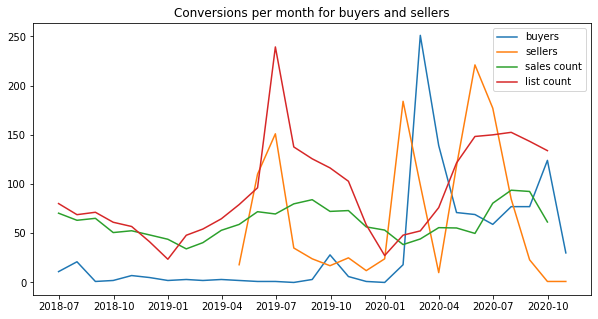

In [28]:
plt.figure(figsize=(10,5))
plt.plot(buyer_denver_mon['date'],buyer_denver_mon['conversions'],label='buyers')
plt.plot(seller_denver_mon['date'],seller_denver_mon['conversions'],label='sellers')
plt.plot(buyer_denver_mon['date'][:-1], monthData['count_sale']/100,label='sales count')
plt.plot(buyer_denver_mon['date'][:-1], monthData['count_list']/100,label='list count')
plt.legend()
plt.title('Conversions per month for buyers and sellers')

Text(0.5, 1.0, 'Costs per month for buyers and sellers')

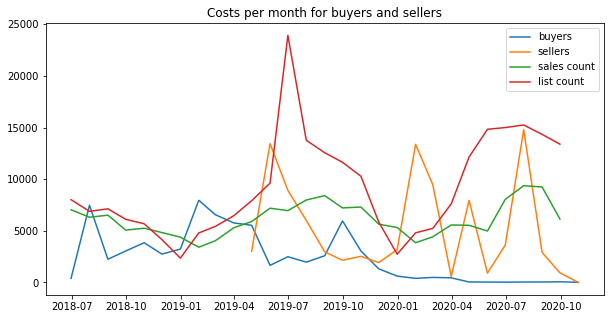

In [29]:
plt.figure(figsize=(10,5))
plt.plot(buyer_denver_mon['date'],buyer_denver_mon['cost'],label='buyers')
plt.plot(seller_denver_mon['date'],seller_denver_mon['cost'],label='sellers')
plt.plot(buyer_denver_mon['date'][:-1], monthData['count_sale'],label='sales count')
plt.plot(buyer_denver_mon['date'][:-1], monthData['count_list'],label='list count')
plt.legend()
plt.title('Costs per month for buyers and sellers')

### Possible features 2:  Impressions/clicks/conversions per property, click/conversion rates per impression

In [31]:
cols = seller_denver_mon.columns[1:-1]
for col in cols:
    seller_denver_mon[col+'_per'] = seller_denver_mon[col]/seller_denver_mon['property_count']
seller_denver_mon['conversion_rate'] = seller_denver_mon['conversions']/seller_denver_mon['impressions']
seller_denver_mon['click_rate'] = seller_denver_mon['clicks']/seller_denver_mon['impressions']

In [32]:
seller_denver_mon.head()

,date,impressions,clicks,conversions,cost,property_count,impressions_per,clicks_per,conversions_per,cost_per,conversion_rate,click_rate
0,2019-04-30,999765,5915,18.0,3027.24,25,39990.600000,236.600000,0.720000,121.089600,0.000018,0.005916
1,2019-05-31,3185963,11402,110.0,13437.86,175,18205.502857,65.154286,0.628571,76.787771,0.000035,0.003579
2,2019-06-30,2275284,5447,151.0,8912.25,137,16607.912409,39.759124,1.102190,65.052920,0.000066,0.002394
3,2019-07-31,460626,2503,35.0,6004.47,89,5175.573034,28.123596,0.393258,67.465955,0.000076,0.005434
4,2019-08-31,261621,2801,24.0,2962.42,92,2843.706522,30.445652,0.260870,32.200217,0.000092,0.010706


In [33]:
cols = buyer_denver_mon.columns[1:-1]
for col in cols:
    buyer_denver_mon[col+'_per'] = buyer_denver_mon[col]/buyer_denver_mon['property_count']
buyer_denver_mon['conversion_rate'] = buyer_denver_mon['conversions']/buyer_denver_mon['impressions']
buyer_denver_mon['click_rate'] = buyer_denver_mon['clicks']/buyer_denver_mon['impressions']

In [34]:
buyer_denver_mon.head()

,date,impressions,clicks,conversions,cost,property_count,impressions_per,clicks_per,conversions_per,cost_per,conversion_rate,click_rate
0,2018-06-30,33678,734,11.0,397.68,45,748.400000,16.311111,0.244444,8.837333,0.000327,0.021795
1,2018-07-31,498969,4163,21.0,7477.29,289,1726.536332,14.404844,0.072664,25.872976,0.000042,0.008343
2,2018-08-31,169968,961,1.0,2247.61,91,1867.780220,10.560440,0.010989,24.699011,0.000006,0.005654
3,2018-09-30,359056,1463,2.0,3046.86,69,5203.710145,21.202899,0.028986,44.157391,0.000006,0.004075
4,2018-10-31,414545,2635,7.0,3844.94,248,1671.552419,10.625000,0.028226,15.503790,0.000017,0.006356


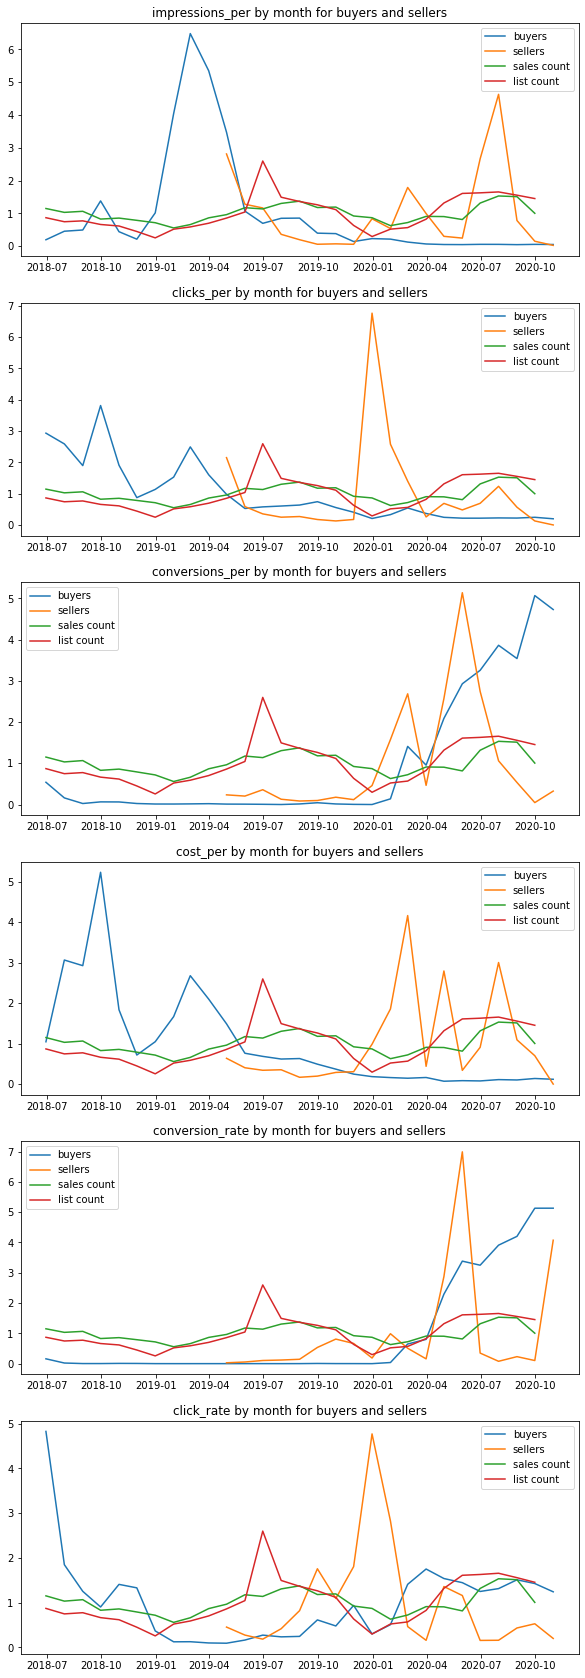

In [35]:

fig,ax = plt.subplots(6,1,figsize=(10,30))
for i,col in enumerate(buyer_denver_mon.columns[6:]):
    ax[i].plot(buyer_denver_mon['date'],buyer_denver_mon[col]/np.mean(buyer_denver_mon[col]),label='buyers')
    ax[i].plot(seller_denver_mon['date'],seller_denver_mon[col]/np.mean(seller_denver_mon[col]),label='sellers')
    ax[i].plot(buyer_denver_mon['date'][:-1], monthData['count_sale']/np.mean(monthData['count_sale']),label='sales count')
    ax[i].plot(buyer_denver_mon['date'][:-1], monthData['count_list']/np.mean(monthData['count_list']),label='list count')
    ax[i].legend()
    ax[i].set_title(str(col)+' by month for buyers and sellers')

## Part 3: Correlation analysis: predict number of list, number of sales in 3 months 

In [36]:
seller_denver_mon['month'] = seller_denver_mon['date'].apply(lambda x: str(x)[:-12])
buyer_denver_mon['month'] = buyer_denver_mon['date'].apply(lambda x: str(x)[:-12])

In [42]:
merged = pd.merge(pd.merge(monthData,seller_denver_mon,on='month',how ='outer'),buyer_denver_mon,on='month',how='outer',suffixes=('_s','_b'))

In [43]:
merged['target_list'] = merged['count_list'].shift(-3)
merged['target_sale'] = merged['count_sale'].shift(-3)

In [44]:
merged = merged.drop(['count_sale','count_list','mean_price'],axis=1)

In [60]:
corr_matrix = merged.corr()
corr_matrix[['target_list','target_sale']]

,target_list,target_sale
impressions_s,0.246765,0.328394
clicks_s,0.057026,0.033402
conversions_s,0.561063,0.367375
cost_s,0.348772,0.114772
property_count_s,-0.182140,0.112777
impressions_per_s,0.553838,0.176823
clicks_per_s,0.011052,-0.132229
conversions_per_s,0.574411,0.371300
cost_per_s,0.487434,-0.025008
conversion_rate_s,0.286839,0.455831


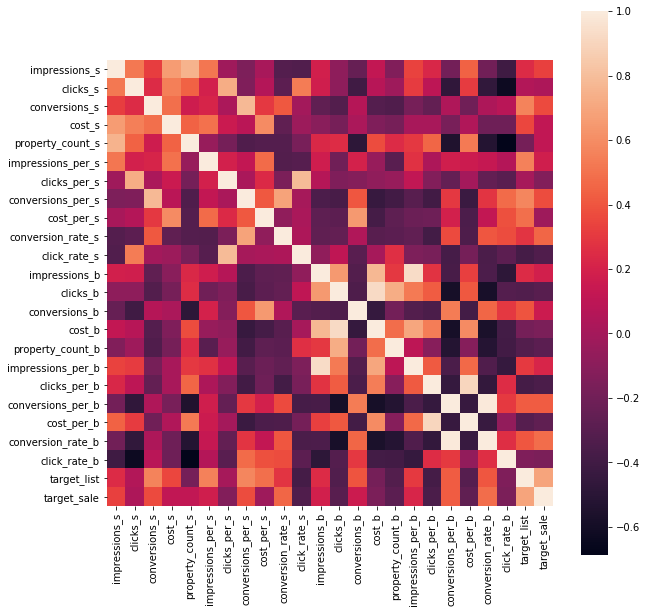

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,square=True)

In [58]:
#set threshold to abs(correlation) >= 0.4
print(corr_matrix['target_list'][abs(corr_matrix['target_list'])>=0.4])
print(corr_matrix['target_sale'][abs(corr_matrix['target_sale'])>=0.4])

conversions_s        0.561063
impressions_per_s    0.553838
conversions_per_s    0.574411
cost_per_s           0.487434
conversions_per_b    0.423491
conversion_rate_b    0.406308
target_list          1.000000
target_sale          0.695372
Name: target_list, dtype: float64
conversion_rate_s    0.455831
conversions_per_b    0.421306
conversion_rate_b    0.484458
target_list          0.695372
target_sale          1.000000
Name: target_sale, dtype: float64
